In [104]:
import numpy as np 
import matplotlib
from matplotlib import pyplot as plt 
import cv2



In [105]:
from google.colab.patches import cv2_imshow
from numpy.lib.histograms import histogram
from numpy.ma.core import equal

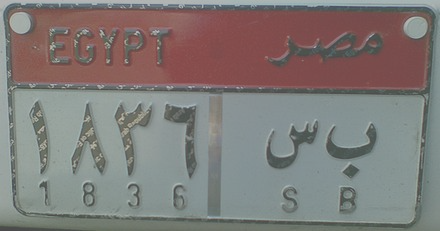

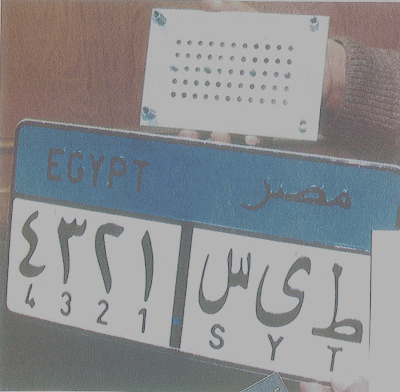

In [106]:
#read image1 and show it
image1=cv2.imread('/content/image-1.png')
cv2_imshow(image1)


#read image2 and show it
image2=cv2.imread('/content/image-2.png')
cv2_imshow(image2)


In [107]:
# get RGB matrix for image1
image1_matrix = np.asarray(image1)
print(image1_matrix)


[[[181 181 177]
  [180 178 174]
  [181 181 179]
  ...
  [178 178 166]
  [178 178 166]
  [178 177 166]]

 [[181 181 178]
  [181 180 177]
  [178 178 177]
  ...
  [176 176 165]
  [177 177 166]
  [178 178 166]]

 [[180 180 177]
  [180 180 178]
  [181 181 180]
  ...
  [176 176 166]
  [176 177 167]
  [177 177 167]]

 ...

 [[ 76  78  78]
  [ 76  78  77]
  [ 75  77  77]
  ...
  [123 130 120]
  [123 130 120]
  [123 130 120]]

 [[ 76  75  76]
  [ 76  75  76]
  [ 76  75  76]
  ...
  [120 128 119]
  [121 129 119]
  [121 129 119]]

 [[ 76  75  76]
  [ 76  75  76]
  [ 77  75  76]
  ...
  [118 127 118]
  [119 128 118]
  [119 128 118]]]


In [108]:
# get RGB matrix for image2
image2_matrix = np.asarray(image2)
print(image2_matrix)

[[[168 178 175]
  [119 107 134]
  [109 131 152]
  ...
  [180 180 180]
  [180 180 180]
  [180 180 180]]

 [[180 180 180]
  [110 106 128]
  [109 130 143]
  ...
  [180 180 180]
  [180 180 180]
  [180 180 180]]

 [[180 180 180]
  [ 94 104 129]
  [111 124 147]
  ...
  [131 125 147]
  [135 130 139]
  [127 133 154]]

 ...

 [[144 132 136]
  [130 130 122]
  [131 120 125]
  ...
  [180 180 180]
  [180 180 180]
  [180 180 180]]

 [[130 130 122]
  [123 115 110]
  [123 115 110]
  ...
  [180 180 180]
  [180 180 180]
  [180 180 180]]

 [[180 174 151]
  [180 180 180]
  [176 171 172]
  ...
  [180 180 180]
  [180 180 180]
  [180 180 180]]]


In [109]:
image1_matrix.shape


(231, 440, 3)

In [110]:
image2_matrix.shape

(392, 400, 3)

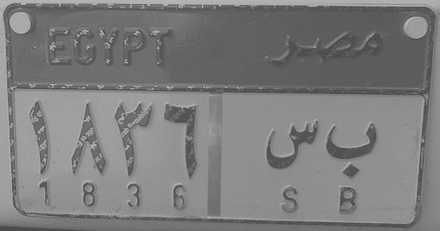

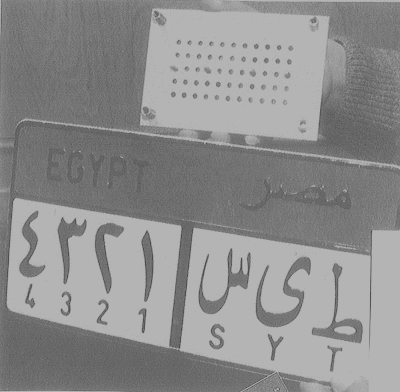

In [111]:
#turn photos into a grayscale 
# image 1

img1=cv2.imread('/content/image-1.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img1)


# image 2

img2=cv2.imread('/content/image-2.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img2)

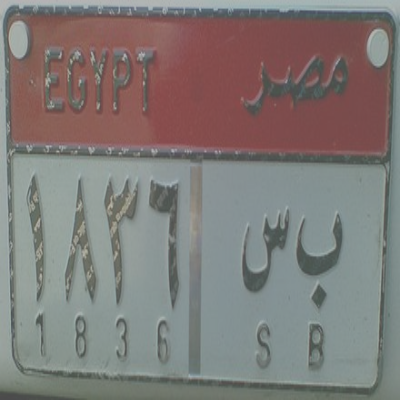

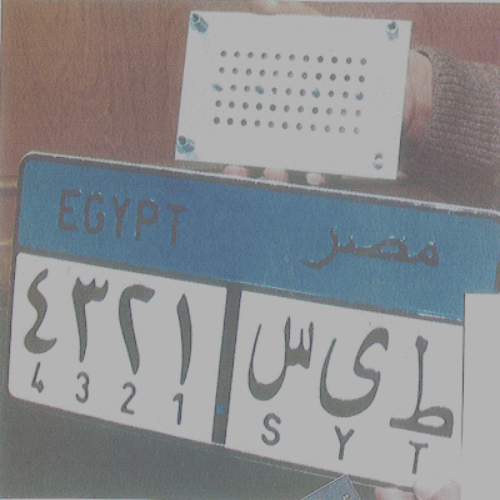

In [112]:
# resize it to get high resolution

res_1=cv2.resize(image1, (400,400))
cv2_imshow(res_1)


res_2=cv2.resize(image2, (500,500))
cv2_imshow(res_2)

variable summary 

1-image1 , image2 (variable that stored image)
2-image1_matrix , image2_matrix ( have matrix of RGB)
3-img1 , img2 (have images with binary image )
4-res_1 ,res_2 (have images after resized )


In [113]:
# before equalization 
# we will  make function to hist images before equalization 
def represent (image ):
  #we will make an zeroes array  to  add to  it
  Z=np.zeros(shape=(256,1))
  n=image.shape #rangeof loop
  for i in range(n[0]):
    for j in range(n[1]):
      k=image[i,j]
      Z[k,0]=Z[k,0]+1  #update Z array
  return Z 





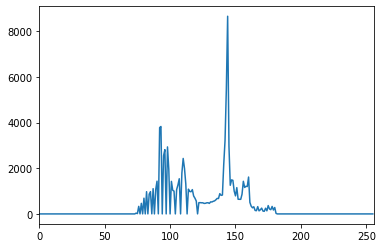

In [114]:
# hist of binary image1 before equalization
eq_im1=represent(img1)
plt.plot(eq_im1)
plt.xlim([0,256])
plt.show()



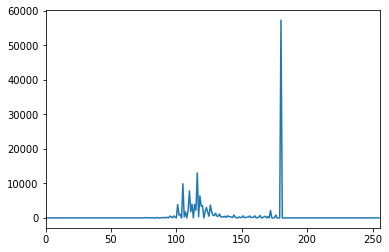

In [115]:
# hist of binary image2 before equalization
eq_im2=represent(img2)
plt.plot(eq_im2)
plt.xlim([0,256])
plt.show()


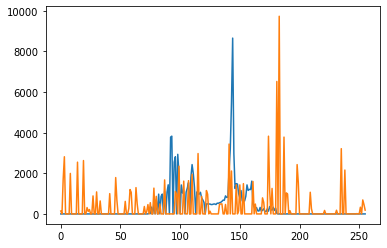

In [116]:
hist=represent(img1)
plt.plot(hist)
x=hist.reshape(1,256)
y=np.array([])
y=np.append(y,x[0,0])
n=img1.shape 


for i in range(255):
  k=x[0,i+1]+y[i]
  y=np.append(y,k)
y=np.round(((y/n[0]*n[1])*255)) 



for i in range(n[0]):
  for j in range(n[1]):
    k=img1[i,j]
    img1[i,j]=y[k]

equal_1=represent(img1)
plt.plot(equal_1)
plt.show()

# orange after equalization and blue before 
#image1

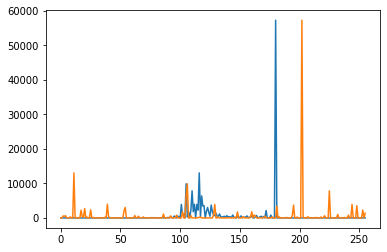

In [117]:
hist2=represent(img2)
plt.plot(hist2)
x=hist.reshape(1,256)
y=np.array([])
y=np.append(y,x[0,0])
n=img2.shape 


for i in range(255):
  k=x[0,i+1]+y[i]
  y=np.append(y,k)
y=np.round(((y/n[0]*n[1])*255)) 



for i in range(n[0]):
  for j in range(n[1]):
    k=img2[i,j]
    img2[i,j]=y[k]

equal_2=represent(img2)
plt.plot(equal_2)
plt.show()
# orange after equalization and blue before 
#image2

In [127]:
# show photos after equalize 
equal_1=represent(img1)
cv2_imshow( equal_1 )

# show photos after equalize 
equal_2=represent(img2)
cv2_imshow( equal_2)